<a href="https://colab.research.google.com/github/Knell999/ML_Ops_HK-Toss/blob/main/Chapter_1_%EA%B8%B0%EC%B4%88/02_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%8F%84%EA%B5%AC/04_%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/02_%EB%B2%94%EC%A3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_with_CCTV%2C_%EC%9D%B8%EA%B5%AC%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
pop_cctv_filepath = "./data/pop_cctv_result.csv"
crime_filepath = "./data/crime_in_Seoul.csv"

In [ ]:
import pandas as pd

df_crime_police = pd.read_csv(crime_filepath, thousands=",", encoding='euc-kr')
df_crime_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   관서명     31 non-null     object
 1   살인 발생   31 non-null     int64 
 2   살인 검거   31 non-null     int64 
 3   강도 발생   31 non-null     int64 
 4   강도 검거   31 non-null     int64 
 5   강간 발생   31 non-null     int64 
 6   강간 검거   31 non-null     int64 
 7   절도 발생   31 non-null     int64 
 8   절도 검거   31 non-null     int64 
 9   폭력 발생   31 non-null     int64 
 10  폭력 검거   31 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.8+ KB


In [ ]:
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


## 경찰서 정보 스크래이핑 하기
서울 시의 구가 25개 구가 있는데, 경찰서는 31개..

---

실제 어떤 구에 어떤 경찰서가 있는지를 파악 - 카카오 검색 엔진을 사용해서 경찰서의 주소를 검색

* 카카오의 검색 엔진은 다음에서 검색한 것과 똑같다.
* 예를 들어 무슨 구에 있는지를 알아내기 위해 **"혜화서"**로 검색을 했더니 시장, 경찰서 등등 필요 없는 정보가 검색이 된다.
* 정확하게 검색하기 위해서 **서울혜화경찰서**로 검색을 했더니 제대로 결과가 나온다.

In [ ]:
station_name = "서울" + df_crime_police["관서명"].str[:-1]+"경찰"+df_crime_police["관서명"].str[-1]
station_name

,관서명
0,서울중부경찰서
1,서울종로경찰서
2,서울남대문경찰서
3,서울서대문경찰서
4,서울혜화경찰서
5,서울용산경찰서
6,서울성북경찰서
7,서울동대문경찰서
8,서울마포경찰서
9,서울영등포경찰서


In [ ]:
station_name = [ f"서울{name[:-1]}경찰서" for name in df_crime_police['관서명']]
station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [ ]:
test_query = "서울광진경찰서"
KAKAO_API_KEY = "3032411cf691dff08e2c264bf4005aeb"

KAKAO_API_URL = "https://dapi.kakao.com/v2/local/search/keyword.json?query={}"

In [ ]:
import requests

headers = {
  "Authorization" : "KakaoAK {}".format(KAKAO_API_KEY)
}

test_response = requests.get(KAKAO_API_URL.format(test_query), headers=headers)
test_response

<Response [200]>

In [ ]:
data = test_response.json()['documents']
data[0]

{'address_name': '서울 광진구 구의동 254-32',
 'category_group_code': 'PO3',
 'category_group_name': '공공기관',
 'category_name': '사회,공공기관 > 행정기관 > 경찰서',
 'distance': '',
 'id': '8211607',
 'phone': '182',
 'place_name': '서울광진경찰서',
 'place_url': 'http://place.map.kakao.com/8211607',
 'road_address_name': '서울 광진구 자양로 167',
 'x': '127.08396170505674',
 'y': '37.54292164557882'}

In [ ]:
data[0]['address_name'].split()[1]

'광진구'

In [ ]:
# 전체 경찰서 주소 얻어내기
station_address = []

headers = {
  "Authorization": "KakaoAK {}".format(KAKAO_API_KEY)
}

for name in station_name:
  response = requests.get(KAKAO_API_URL.format(name), headers=headers)
  address = response.json()['documents'][0]['address_name']

  station_address.append(address)
  print(f"{name} ==> {address}")

station_address

서울중부경찰서 ==> 서울 중구 회현동1가 210
서울종로경찰서 ==> 서울 종로구 공평동 1
서울남대문경찰서 ==> 서울 중구 남대문로5가 561
서울서대문경찰서 ==> 서울 서대문구 충정로3가 63-1
서울혜화경찰서 ==> 서울 종로구 숭인동 165
서울용산경찰서 ==> 서울 용산구 원효로1가 12-12
서울성북경찰서 ==> 서울 성북구 삼선동5가 301
서울동대문경찰서 ==> 서울 동대문구 청량리동 229
서울마포경찰서 ==> 서울 마포구 아현동 618-1
서울영등포경찰서 ==> 서울 영등포구 당산동3가 2-11
서울성동경찰서 ==> 서울 성동구 행당동 192-8
서울동작경찰서 ==> 서울 동작구 노량진동 72-35
서울광진경찰서 ==> 서울 광진구 구의동 254-32
서울서부경찰서 ==> 서울 은평구 녹번동 177-15
서울강북경찰서 ==> 서울 강북구 번동 415-15
서울금천경찰서 ==> 서울 금천구 시흥동 1030
서울중랑경찰서 ==> 서울 중랑구 신내동 810
서울강남경찰서 ==> 서울 강남구 대치동 998
서울관악경찰서 ==> 서울 관악구 봉천동 1695-5
서울강서경찰서 ==> 서울 강서구 화곡동 980-27
서울강동경찰서 ==> 서울 강동구 성내동 541-1
서울종암경찰서 ==> 서울 성북구 하월곡동 27-5
서울구로경찰서 ==> 서울 구로구 구로동 3-25
서울서초경찰서 ==> 서울 서초구 서초동 1726-1
서울양천경찰서 ==> 서울 양천구 신정동 321
서울송파경찰서 ==> 서울 송파구 가락동 9
서울노원경찰서 ==> 서울 노원구 하계동 250
서울방배경찰서 ==> 서울 서초구 방배동 455-10
서울은평경찰서 ==> 서울 은평구 불광동 산 24
서울도봉경찰서 ==> 서울 도봉구 창동 17
서울수서경찰서 ==> 서울 강남구 개포동 14


['서울 중구 회현동1가 210',
 '서울 종로구 공평동 1',
 '서울 중구 남대문로5가 561',
 '서울 서대문구 충정로3가 63-1',
 '서울 종로구 숭인동 165',
 '서울 용산구 원효로1가 12-12',
 '서울 성북구 삼선동5가 301',
 '서울 동대문구 청량리동 229',
 '서울 마포구 아현동 618-1',
 '서울 영등포구 당산동3가 2-11',
 '서울 성동구 행당동 192-8',
 '서울 동작구 노량진동 72-35',
 '서울 광진구 구의동 254-32',
 '서울 은평구 녹번동 177-15',
 '서울 강북구 번동 415-15',
 '서울 금천구 시흥동 1030',
 '서울 중랑구 신내동 810',
 '서울 강남구 대치동 998',
 '서울 관악구 봉천동 1695-5',
 '서울 강서구 화곡동 980-27',
 '서울 강동구 성내동 541-1',
 '서울 성북구 하월곡동 27-5',
 '서울 구로구 구로동 3-25',
 '서울 서초구 서초동 1726-1',
 '서울 양천구 신정동 321',
 '서울 송파구 가락동 9',
 '서울 노원구 하계동 250',
 '서울 서초구 방배동 455-10',
 '서울 은평구 불광동 산 24',
 '서울 도봉구 창동 17',
 '서울 강남구 개포동 14']

In [ ]:
gu_name = [address.split()[1] for address in station_address]
gu_name

['중구',
 '종로구',
 '중구',
 '서대문구',
 '종로구',
 '용산구',
 '성북구',
 '동대문구',
 '마포구',
 '영등포구',
 '성동구',
 '동작구',
 '광진구',
 '은평구',
 '강북구',
 '금천구',
 '중랑구',
 '강남구',
 '관악구',
 '강서구',
 '강동구',
 '성북구',
 '구로구',
 '서초구',
 '양천구',
 '송파구',
 '노원구',
 '서초구',
 '은평구',
 '도봉구',
 '강남구']

In [ ]:
#구별 정보를 원래 데이터프레임에 넣어주기
df_crime_police["구별"] = gu_name
df_crime_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [ ]:
# pivot_table을 활용해 구별로 구분
crime = pd.pivot_table(
    df_crime_police,
    index="구별",
    aggfunc="sum"
)

crime.head()

,강간 검거,강간 발생,강도 검거,강도 발생,관서명,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,,
강남구,349,449,18,21,강남서수서서,10,13,1650,3850,3705,4284
강동구,123,156,8,6,강동서,3,4,789,2366,2248,2712
강북구,126,153,13,14,강북서,8,7,618,1434,2348,2649
강서구,191,262,13,13,강서서,8,7,1260,2096,2718,3207
관악구,221,320,14,12,관악서,8,9,827,2706,2642,3298


In [ ]:
# 관서명 제거
crime = crime.drop("관서명", axis=1)


In [ ]:
crime

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   강간 검거   25 non-null     int64
 1   강간 발생   25 non-null     int64
 2   강도 검거   25 non-null     int64
 3   강도 발생   25 non-null     int64
 4   살인 검거   25 non-null     int64
 5   살인 발생   25 non-null     int64
 6   절도 검거   25 non-null     int64
 7   절도 발생   25 non-null     int64
 8   폭력 검거   25 non-null     int64
 9   폭력 발생   25 non-null     int64
dtypes: int64(10)
memory usage: 2.1+ KB


In [ ]:
crime["강간검거율"] = crime["강간 검거"] / crime["강간 발생"] * 100
crime["강도검거율"] = crime["강도 검거"] / crime["강도 발생"] * 100
crime["살인검거율"] = crime["살인 검거"] / crime["살인 발생"] * 100
crime["절도검거율"] = crime["절도 검거"] / crime["절도 발생"] * 100
crime["폭력검거율"] = crime["폭력 검거"] / crime["폭력 발생"] * 100

crime.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,123,156,8,6,3,4,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,126,153,13,14,8,7,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,191,262,13,13,8,7,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,221,320,14,12,8,9,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [ ]:
# 검거율을 구했으니, 검거데이터 제거
crime = crime.drop(["강간 검거", "강도 검거", "살인 검거", "절도 검거", "살인 검거","폭력 검거"], axis=1)

In [ ]:
# 컬럼의 이름을 바꾸기 위해서는 rename 함수
crime = crime.rename(
    columns={
        "강간 발생": "강간",
        "강도 발생": "강도",
        "살인 발생": "살인",
        "절도 발생": "절도",
        "폭력 발생": "폭력"
    }
)

crime.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [ ]:
col_list = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
for col in col_list:
  crime.loc[crime[col] > 100, col] = 100

crime.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [ ]:
crime

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619
구로구,281,15,8,2335,3007,58.362989,73.333333,75.000000,38.072805,80.877951
금천구,151,6,3,1567,2054,80.794702,100.000000,100.000000,56.668794,86.465433
노원구,197,7,10,2193,2723,61.421320,100.000000,100.000000,36.525308,85.530665


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 범죄 발생 건수 데이터 정규화
- 모든 범죄 건수 데이터를 0 ~ 1 사이로 정규화

In [ ]:
crime_columns = ["강간", "강도", "살인", "절도", "폭력"]
x = crime[crime_columns].values #.values를 사용하면 판다스 데이터 프레임을 넘파이 배열화 시켜준다.

minmax_scaler = MinMaxScaler()

scaled_x = minmax_scaler.fit_transform(x)

crime_scaled = pd.DataFrame(scaled_x, columns=crime_columns, index=crime.index)
crime_scaled.head()

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479


In [ ]:
crime_scaled

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000
강동구,0.155620,0.058824,0.166667,0.467528,0.437969
강북구,0.146974,0.529412,0.416667,0.133118,0.415445
강서구,0.461095,0.470588,0.416667,0.370649,0.614945
관악구,0.628242,0.411765,0.583333,0.589523,0.647479
광진구,0.397695,0.529412,0.166667,0.704342,0.406864
구로구,0.515850,0.588235,0.500000,0.456405,0.543439
금천구,0.141210,0.058824,0.083333,0.180840,0.202717
노원구,0.273775,0.117647,0.666667,0.405454,0.441902


In [ ]:
crime_scaled[col_list] = crime[col_list]
crime_scaled.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [ ]:
pop_cctv = pd.read_csv(pop_cctv_filepath, index_col="구별")
pop_cctv.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,162.948104


In [ ]:
crime_scaled[["인구수", "CCTV"]] = pop_cctv[["인구수", "소계"]]
crime_scaled.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [ ]:
import numpy as np

crime_scaled["범죄"] = np.sum(crime_scaled[crime_columns], axis=1)
crime_scaled.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [ ]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_scaled["검거율"] = np.sum(crime_scaled[col], axis=1)

crime_scaled.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


# 목표 재확인
- 각 구가 범죄로 부터 얼마나 안전한지를 확인
- 범죄에 대한 검거율, 범죄 발생 정도, 범죄에 대한 CCTV, 인구 수 관계 확인, 검거율과 CCTV 인구수 관계

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


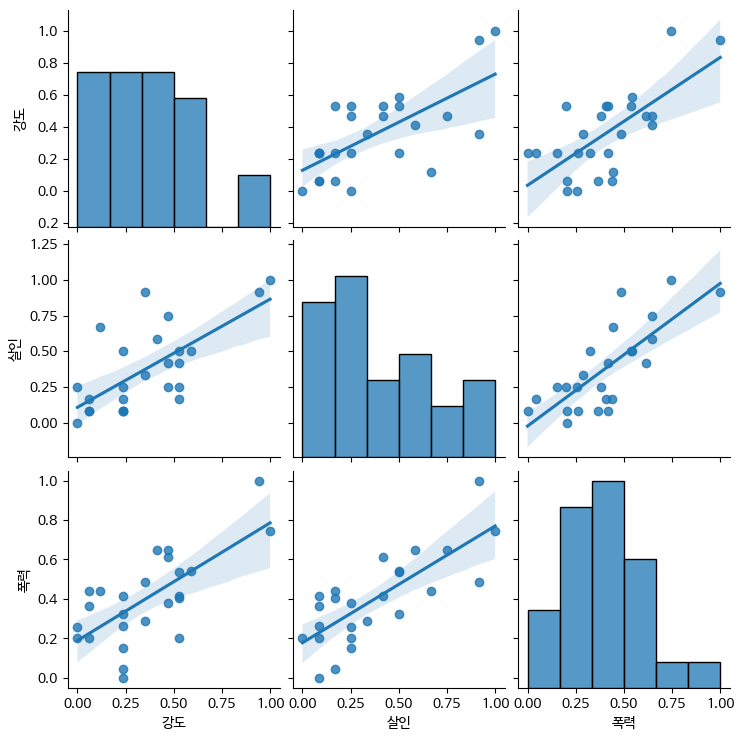

In [ ]:
import seaborn as sns

sns.pairplot(
    crime_scaled,
    vars=["강도", "살인", "폭력"],
    kind='reg' # 직선 추세 확인 (Regression)
)

plt.show()

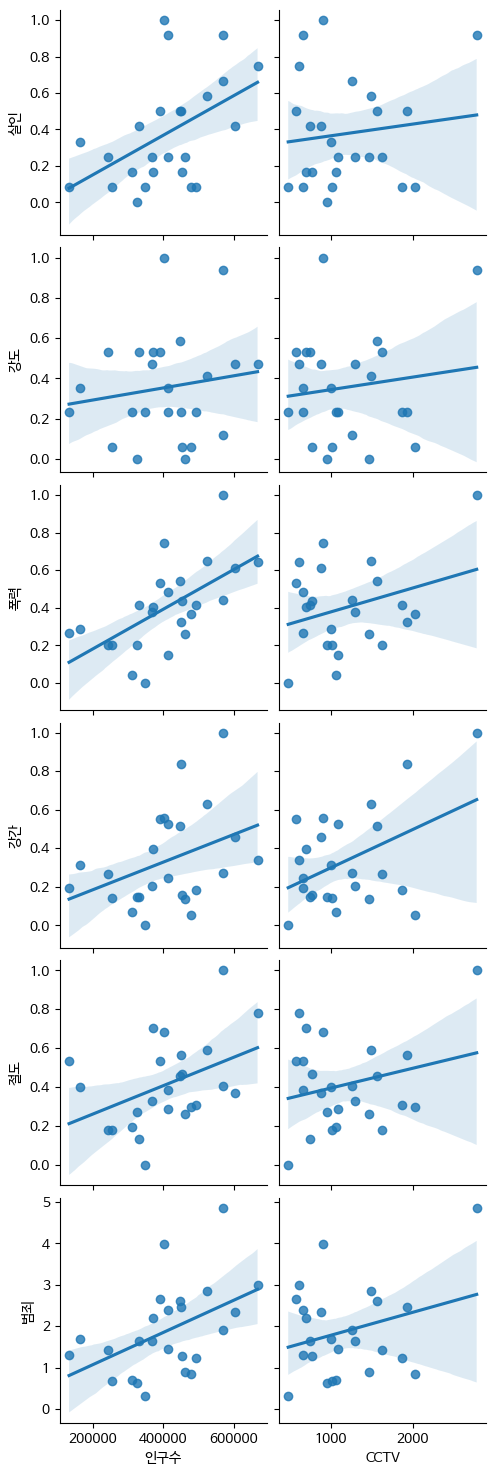

In [ ]:
# 인구수, CCTV, 범죄에 대한 상관관계 확인
sns.pairplot(
    crime_scaled,
    x_vars = ["인구수", "CCTV"],
    y_vars = ["살인", "강도", "폭력", "강간", "절도", "범죄"],
    kind = "reg"
)

plt.show()

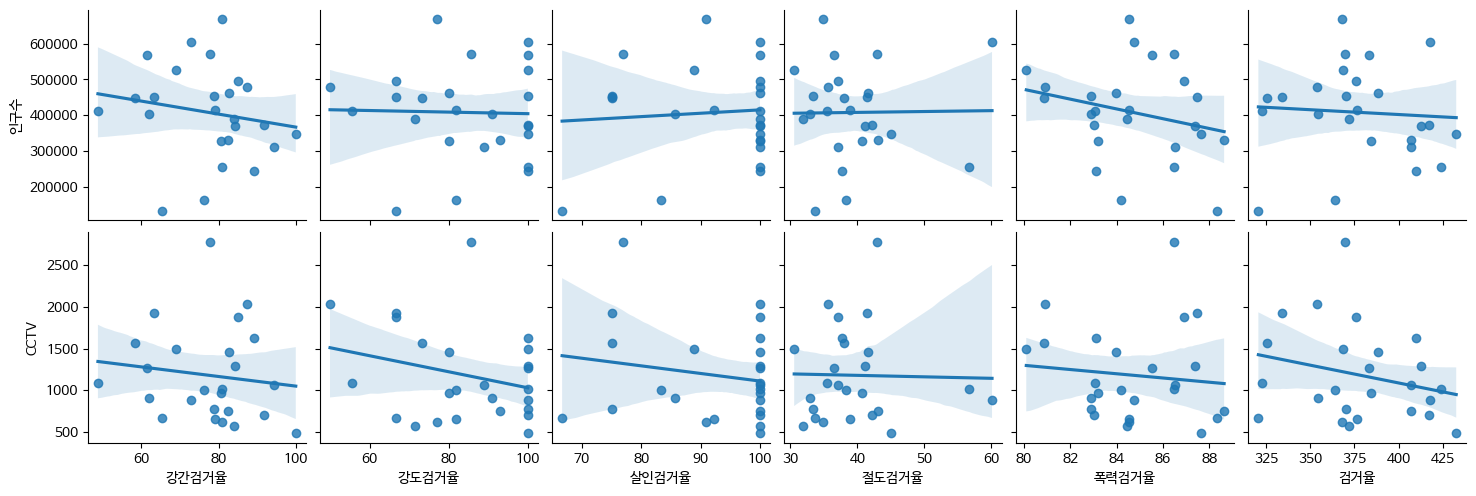

In [ ]:
# 인구수, CCTV 그리고 검거율의 상관관계 보기

sns.pairplot(
    crime_scaled,
    y_vars=["인구수", "CCTV"],
    x_vars=["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", "검거율"],
    kind='reg'
)

plt.show()

In [ ]:
# 검거의 최댓값 가져오기
tmp_max = crime_scaled["검거율"].max()

crime_scaled["검거율"] = crime_scaled["검거율"] / tmp_max * 100

crime_scaled_sorted = crime_scaled.sort_values(by="검거율", ascending=False)
crime_scaled_sorted.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거율
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


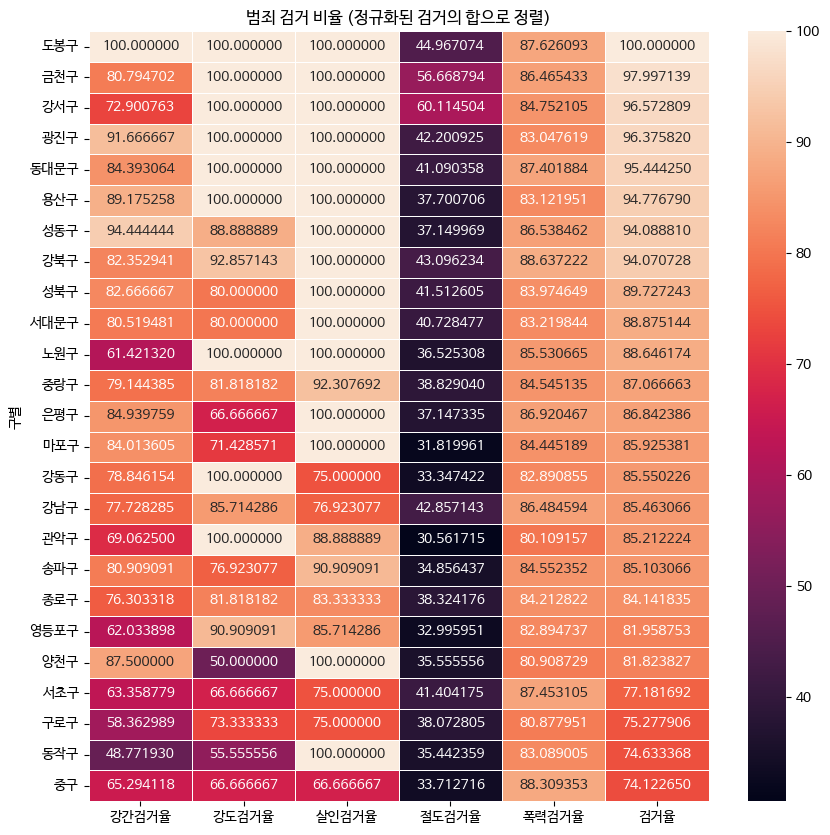

In [ ]:
col = ["강간검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율", '검거율']

plt.figure(figsize=(10,10))

sns.heatmap(
    crime_scaled_sorted[col],
    annot=True,
    fmt='f',
    linewidths=0.5
)

plt.title("범죄 검거 비율 (정규화된 검거의 합으로 정렬)")
plt.show()

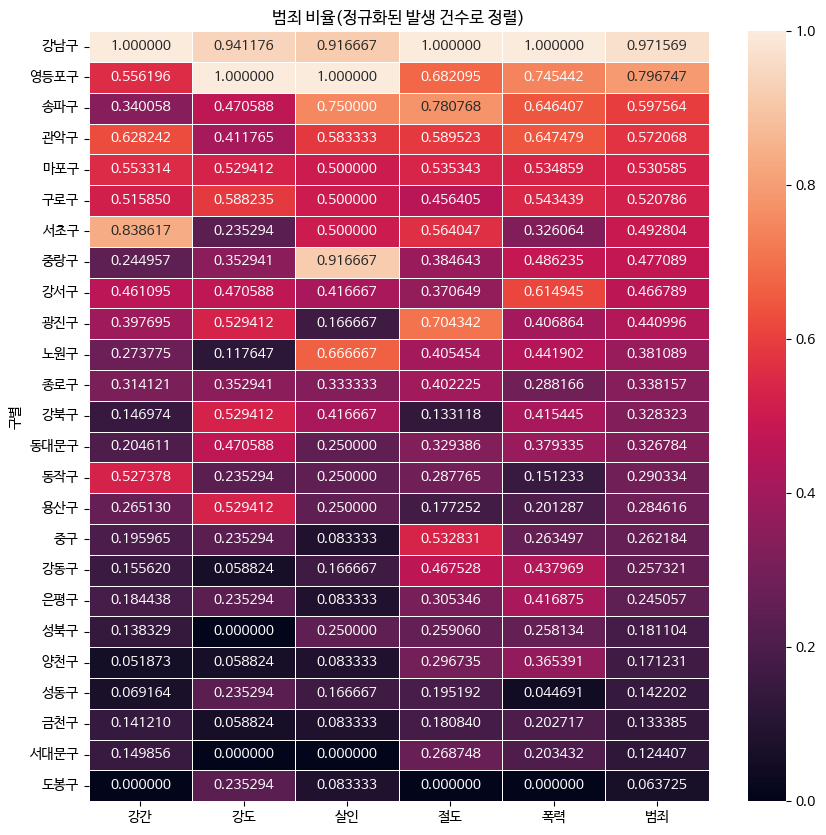

In [ ]:
col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_scaled["범죄"] = crime_scaled["범죄"] / 5

crime_scaled_sorted = crime_scaled.sort_values(by="범죄", ascending=False)

plt.figure(figsize=(10, 10))
sns.heatmap(
    crime_scaled_sorted[col],
    annot=True,
    fmt='f',
    linewidths=0.5
)

plt.title("범죄 비율(정규화된 발생 건수로 정렬)")
plt.show()